Instalacja potrzebnych pakietów

In [6]:
#!pip install lifelines

In [1]:
import pandas as pd

Wczytanie danych z pliku aids_data.csv

In [36]:
# read dataset from aids_data.csv
df = pd.read_csv('aids_data.csv', sep=';')

# data (as pandas dataframes)
X = df.iloc[:, :-1]  # all columns except the last as features
y = df.iloc[:, -1]   # the last column as targets

KOD 1 


In [13]:
import pandas as pd
from lifelines import WeibullAFTFitter
import matplotlib.pyplot as plt

In [14]:
print(df.columns)

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'cid'],
      dtype='object')


In [37]:
# Przygotowanie danych — zachowanie wymaganych kolumn
df = df.dropna(subset=["trt", "hemo", "cd40", "age", "karnof", "gender", "homo", "drugs"])

In [25]:
# Dopasowanie modelu Weibulla
variables = ['trt', 'hemo', 'cd40', 'age', 'karnof', 'gender', 'homo', 'drugs']

# Dopasowanie modelu Weibull AFT
aft = WeibullAFTFitter()
aft.fit(df[variables + ['time', 'cid']], duration_col='time', event_col='cid')


<lifelines.WeibullAFTFitter: fitted with 2139 total observations, 1618 right-censored observations>

In [26]:
# Podsumowanie współczynników
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 2139 total observations, 1618 right-censored observations>
             duration col = 'time'
                event col = 'cid'
   number of observations = 2139
number of events observed = 521
           log-likelihood = -4669.42
         time fit was run = 2025-05-06 13:00:02 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ age       -0.01      0.99      0.00           -0.01            0.00                0.99                1.00
        cd40       0.00      1.00      0.00            0.00            0.00                1.00                1.00
        drugs      0.20      1.23      0.10            0.01            0.39                1.01                1.48
        gender    -0.02      0.98      0.12           -0.25            0.20                0.78                1.22
        hemo      -0.05      0.95      0.13           -0.31            0.22                0.73                1.24
        homo      -0.06      0.94      0.10           -0.26            0.13                0.77                1.14
        karnof     0.02      1.02      0.00            0.01            0.03                1.01                1.03
        trt        0.12      1.13      0.03            0.07            0.17                1.07                1.19
        Intercept  5.03    153.68      0.46            4.13            5.94               62.43              378.29
rho_    Intercept  0.44      1.56      0.04            0.36            0.52                1.44                1.69

                   cmp to     z      p  -log2(p)
param   covariate                               
lambda_ age          0.00 -1.71   0.09      3.53
        cd40         0.00  8.81 <0.005     59.52
        drugs        0.00  2.09   0.04      4.76
        gender       0.00 -0.21   0.83      0.27
        hemo         0.00 -0.35   0.72      0.47
        homo         0.00 -0.61   0.54      0.89
        karnof       0.00  4.49 <0.005     17.07
        trt          0.00  4.60 <0.005     17.83
        Intercept    0.00 10.96 <0.005     90.37
rho_    Intercept    0.00 10.96 <0.005     90.51
---
Concordance = 0.65
AIC = 9358.83
log-likelihood ratio test = 149.05 on 8 df
-log2(p) of ll-ratio test = 91.39

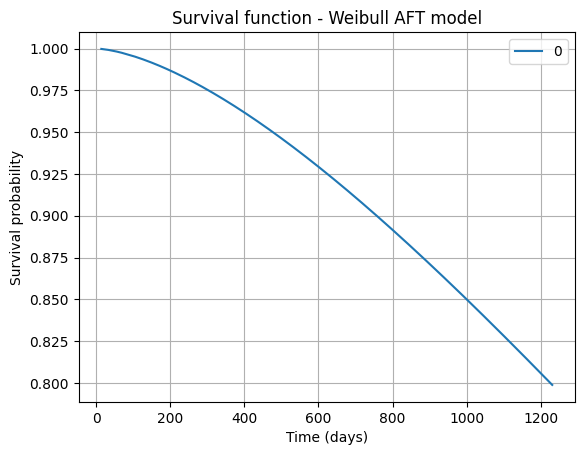

In [28]:
# Przykładowa funkcja przeżycia dla pierwszego rekordu
surv_func = aft.predict_survival_function(df.iloc[0:1])
surv_func.plot(title="Survival function - Weibull AFT model")
plt.xlabel("Time (days)")
plt.ylabel("Survival probability")
plt.grid(True)
plt.show()

KOD 2

Dopasowanie różnych modeli AFT i porównanie ich wyników

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import LogNormalAFTFitter, LogLogisticAFTFitter, WeibullAFTFitter

In [38]:
# Lista zmiennych objaśniających
variables = ['trt', 'hemo', 'cd40', 'age', 'karnof', 'gender', 'drugs', 'homo']

In [40]:
# Przygotowanie danych (upewnij się, że kolumny istnieją!)
data = df[variables + ['time', 'cid']]

In [41]:
# Modele do porównania
models = {
    "Weibull AFT": WeibullAFTFitter(),
    "Log-Logistic AFT": LogLogisticAFTFitter(),
    "Log-Normal AFT": LogNormalAFTFitter()
}

In [42]:
# Lista na wyniki
results = []

for name, model in models.items():
    model.fit(data, duration_col='time', event_col='cid')
    results.append({
        'Model': name,
        'AIC': model.AIC_,
        'Concordance': model.concordance_index_
    })

In [43]:
# Podsumowanie wyników
results_df = pd.DataFrame(results).sort_values(by='AIC')
print(results_df)

              Model          AIC  Concordance
2    Log-Normal AFT  9332.818400     0.655015
1  Log-Logistic AFT  9344.715174     0.655182
0       Weibull AFT  9358.834023     0.654933


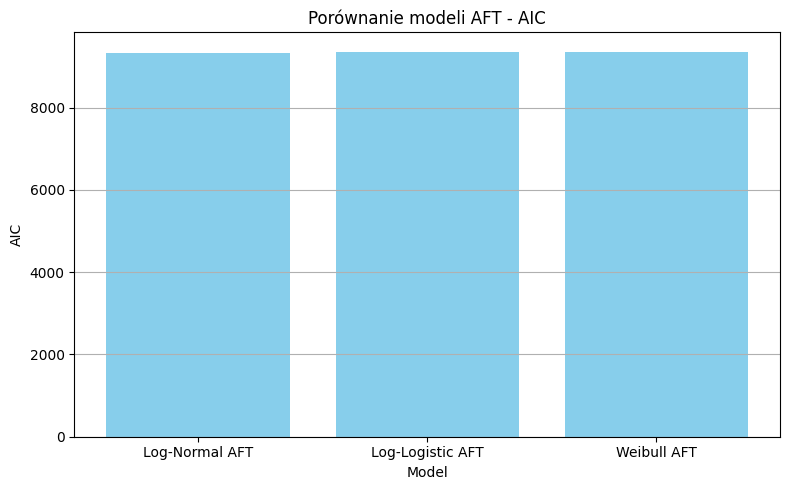

In [ ]:
# Wykres AIC
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['AIC'], color='skyblue')
plt.title('Porównanie modeli AFT - AIC')
plt.ylabel('AIC')
plt.xlabel('Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

KOD 3

Dopasowanie modelu log-normalnego AFT

In [45]:
import pandas as pd
from lifelines import LogNormalAFTFitter

In [50]:
# Wszystkie zmienne do modelu
all_variables = ['trt', 'hemo', 'homo', 'drugs', 'gender', 'cd40', 'age', 'karnof']
outcome_vars = ['time', 'cid']

In [51]:
# Oddzielnie: zmienne kategoryczne i liczbowe
categorical_vars = ['trt', 'hemo', 'homo', 'drugs', 'gender']
numeric_vars = ['cd40', 'age', 'karnof']

In [52]:
# Tworzenie zmiennych typu dummy tylko dla zmiennych kategorycznych
dummies = pd.get_dummies(df[categorical_vars], drop_first=True)

In [53]:
# Składanie końcowego zbioru do modelowania
model_data = pd.concat([dummies, df[numeric_vars + outcome_vars]], axis=1)

In [54]:
# Dopasowanie modelu log-normalnego AFT
aft = LogNormalAFTFitter()
aft.fit(model_data, duration_col='time', event_col='cid')

<lifelines.LogNormalAFTFitter: fitted with 2139 total observations, 1618 right-censored observations>

In [55]:
# Wyświetlenie wyników
aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 2139 total observations, 1618 right-censored observations>
             duration col = 'time'
                event col = 'cid'
   number of observations = 2139
number of events observed = 521
           log-likelihood = -4656.41
         time fit was run = 2025-05-06 14:06:20 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                  
mu_    age       -0.01      0.99      0.00           -0.01            0.00                0.99                1.00
       cd40       0.00      1.00      0.00            0.00            0.00                1.00                1.00
       drugs      0.19      1.21      0.10           -0.02            0.39                0.98                1.48
       gender    -0.05      0.95      0.13           -0.30            0.20                0.74                1.22
       hemo      -0.03      0.97      0.15           -0.32            0.27                0.72                1.31
       homo      -0.07      0.94      0.11           -0.28            0.15                0.75                1.16
       karnof     0.02      1.02      0.01            0.01            0.03                1.01                1.03
       trt        0.14      1.16      0.03            0.09            0.20                1.09                1.22
       Intercept  4.57     96.89      0.54            3.52            5.63               33.72              278.38
sigma_ Intercept  0.09      1.10      0.04            0.02            0.16                1.02                1.18

                  cmp to     z      p  -log2(p)
param  covariate                               
mu_    age          0.00 -1.90   0.06      4.12
       cd40         0.00  9.39 <0.005     67.19
       drugs        0.00  1.81   0.07      3.83
       gender       0.00 -0.41   0.68      0.55
       hemo         0.00 -0.18   0.86      0.22
       homo         0.00 -0.59   0.56      0.85
       karnof       0.00  4.47 <0.005     16.97
       trt          0.00  5.14 <0.005     21.83
       Intercept    0.00  8.49 <0.005     55.47
sigma_ Intercept    0.00  2.65   0.01      6.96
---
Concordance = 0.66
AIC = 9332.82
log-likelihood ratio test = 159.92 on 8 df
-log2(p) of ll-ratio test = 98.93

In [56]:
# Macierz kowariancji współczynników (jak COVB w SAS)
print("\nMacierz kowariancji (COVB):")
print(aft.variance_matrix_)


Macierz kowariancji (COVB):
param                      mu_                                            \
covariate                  age          cd40         drugs        gender   
param  covariate                                                           
mu_    age        1.364345e-05  9.371882e-09 -2.303488e-05 -6.807622e-06   
       cd40       9.371882e-09  8.714390e-08  4.013724e-07  3.315899e-07   
       drugs     -2.303488e-05  4.013724e-07  1.072059e-02 -1.249917e-03   
       gender    -6.807622e-06  3.315899e-07 -1.249917e-03  1.645086e-02   
       hemo       8.195317e-05  4.192071e-07  2.785329e-03 -9.682479e-03   
       homo      -2.147339e-05 -6.376604e-07  2.601078e-03 -1.023879e-02   
       karnof     1.358205e-06 -9.441137e-08  4.876142e-05  4.704584e-06   
       trt       -6.831974e-07  4.859622e-07 -5.398845e-05  7.501787e-05   
       Intercept -6.116691e-04 -1.841856e-05 -5.839013e-03 -6.429222e-03   
sigma_ Intercept -8.052238e-06  2.237270e-06  2.135840e-04 

KOD 4 - Cenzurowanie lewo i prawostronne


W badaniu ACTG175 dotyczącym pacjentów z HIV występuje **prawostronne cenzorowanie (right censoring)**, które ma miejsce, gdy pacjent nie doświadczył zdarzenia (np. spadku liczby CD4, rozwoju AIDS lub zgonu) w czasie trwania obserwacji — wiemy, że przeżył co najmniej do momentu zakończenia badania, ale nie wiemy, co stało się później. **Lewostronne cenzorowanie (left censoring)** nie występuje w tym badaniu, ponieważ moment rozpoczęcia obserwacji (czyli włączenie do badania) jest dokładnie znany i żaden pacjent nie miał zdarzenia przed tym momentem. W związku z tym do analizy wystarczy uwzględnić prawostronne cenzorowanie, które jest domyślnie obsługiwane przez modele przeżycia po przekazaniu kolumn `time` i `status`.



KOD 5 - Cenzurowanie interwałowe

Nie jest konieczne albowiem wiemy dokładnie kiedy zdarzenie miało miejsce (pomimo tego, że w badaniu wizyty odbywały się najczęściej co 12 tygodni to zapis wszystkich wydarzeń jest w dniach, przez co dokładnie wiemy kiedy możliwe zdarzenie 1 miało miejsce)

KOD 6 - 

In [8]:
print(X.head())

   time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0   948    2   48  89.8128     0     0      0     100       0    0  ...   
1  1002    3   61  49.4424     0     0      0      90       0    1  ...   
2   961    3   45  88.4520     0     1      1      90       0    1  ...   
3  1166    3   47  85.2768     0     1      0     100       0    1  ...   
4  1090    0   43  66.6792     0     1      0     100       0    1  ...   

   gender  str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  
0       0     0      1        0      1       0   422    477   566    324  
1       0     1      3        0      1       0   162    218   392    564  
2       1     1      3        0      1       1   326    274  2063   1893  
3       1     1      3        0      1       0   287    394  1590    966  
4       1     1      3        0      0       0   504    353   870    782  

[5 rows x 23 columns]


In [8]:
print(y.head())

0    0
1    1
2    0
3    0
4    0
Name: cid, dtype: int64


In [5]:
# variable information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 1 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   time;trt;age;wtkg;hemo;homo;drugs;karnof;oprior;z30;zprior;preanti;race;gender;str2;strat;symptom;treat;offtrt;cd40;cd420;cd80;cd820;cid  2139 non-null   object
dtypes: object(1)
memory usage: 16.8+ KB
None
